# UJIIndoorLoc WLAN Fingerprint dataset EDA

In this notebook, I perform an initial exploratory data analysis on the UJIIndoorLoc dataset followed by data pre-processing and dimensionality reduction.

In [582]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [583]:
train_data = pd.read_csv("data/trainingData.csv")
test_data = pd.read_csv("data/validationData.csv")

## Dataset Description

Source: https://www.kaggle.com/giantuji/UjiIndoorLoc

- **WAP001-WAP520**: Intensity value for WAP001. Negative integer values from -104 to 0 and +100. Positive value 100 used if WAP001 was not detected.

- **Longitude**: Longitude. Negative real values from -7695.9387549299299000 to -7299.786516730871000

- **Latitude**: Latitude. Positive real values from 4864745.7450159714 to 4865017.3646842018.

- **Floor**: Altitude in floors inside the building. Integer values from 0 to 4.

- **BuildingID**: ID to identify the building. Measures were taken in three different buildings. Categorical integer values from 0 to 2.

- **SpaceID**: Internal ID number to identify the Space (office, corridor, classroom) where the capture was taken. Categorical integer values.

- **RelativePosition**: Relative position with respect to the Space (1 - Inside, 2 - Outside in Front of the door). Categorical integer values.

- **UserID**: User identifier (see below). Categorical integer values.

- **PhoneID**: Android device identifier (see below). Categorical integer values.

- **Timestamp**: UNIX Time when the capture was taken. Integer value.

In [584]:
train_data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [585]:
train_data.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [586]:
# Response variables in our problem are Building, Floor, Latitude, Longitude and Relative Position
(train_data[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']]
.astype(str)
.describe(include=['object']))

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
count,19937,19937,19937,19937,19937,19937
unique,5,3,123,2,18,16
top,3,2,202,2,11,14
freq,5048,9492,484,16608,4516,4835


From the [paper](http://ieeexplore.ieee.org/document/7275492/) on this dataset:
"Although both the training subset and the validation subset contain the same information, the latter includes the value 0 in some fields. These fields are: SpaceID, Relative Position with respect to SpaceID and UserID. As it has been commented before, this information was not recorded because the validation captures were taken at arbitrary points and the users were not tracked in this phase. **This fact tries to simulate a real localization system.**"

Hence, Space ID, Relative Position, User ID won't be used to model the Localization algorithm. Also, Phone iD won't be used as in a real system, new phones should be localized without being used in the training.

Next, I focus on the pre-processing of the WAP RSSI columns.

## Data Pre-Processing

In [587]:
wap_train = train_data.iloc[:,:520]
wap_test = test_data.iloc[:,:520]
wap_train.shape

(19937, 520)

In [588]:
wap_train = (wap_train
             .replace(to_replace=100,value=np.nan))

# Perform the same transform on Test data
wap_test = (wap_test
             .replace(to_replace=100,value=np.nan))

In [589]:
wap_stack = wap_train.stack(dropna=False)

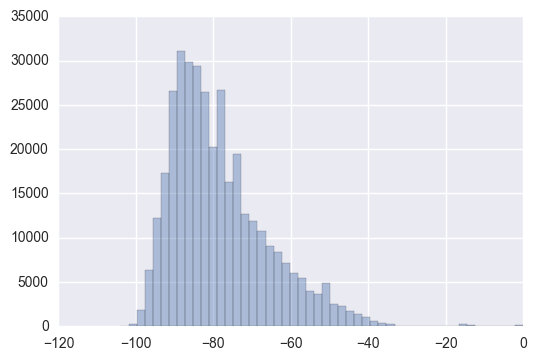

In [590]:
sns.distplot(wap_stack.dropna(),kde = False)

Skewness is a measure of asymmetry of distribution. Clearly, the distribution above appears right-skewed with majority of the values being on the left side of the distribution. Let's look at the skewness value for inidividual WAP RSSI distributions! We might have to perform a log/ Box-Cox transformation to overcome the skewness. 

Let's look at percentage of out-of-range overall and column wise.

In [591]:
# Proportion of out of range values
sum(wap_stack.isnull() == 0)/len(wap_stack)

0.034605449473533938

**96.1% of the values in the matrix represent Out-of-Range.** This is expected as for any given measurement, only a subset of the APs might be in reach of the mobile device.

For this purpose, let's analyze the ditribution of number of APs in range for the training data samples.

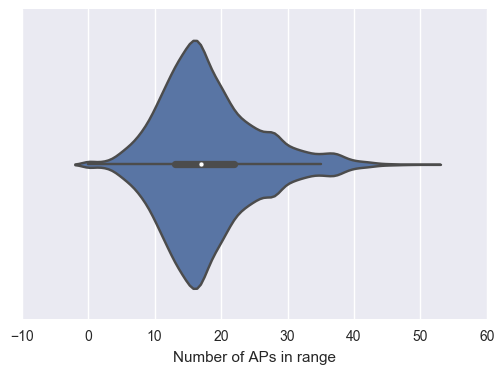

In [592]:
waps_in_range = (wap_train
                 .notnull()
                 .sum(axis = 1))

fig, ax = plt.subplots(1,1)

sns.violinplot(waps_in_range, ax = ax)
ax.set_xlabel("Number of APs in range")

In [593]:
waps_in_range.describe()

count    19937.000000
mean        17.994834
std          7.333575
min          0.000000
25%         13.000000
50%         17.000000
75%         22.000000
max         51.000000
dtype: float64

Interestingly, majority of the samples have over 10 APs in range with the maximum of 51 APs. We do observe some of the training samples with 0 APs in range. Let's remove these samples from the training data.

In [594]:
print("Before sample removal:", len(wap_train))

wap_train = (wap_train
             .loc[wap_train
                  .notnull()
                  .any(axis=1),:])

print("After sample removal:", len(wap_train))

Before sample removal: 19937
After sample removal: 19861


We cannot delete training samples with just a single AP or few APs in range as that is the best information we have to localize. 

We can remove the RSSI columns related to APs which are not in range in any of our training samples.

In [595]:
# Removing columns with all NaN values
all_nan = (wap_train
           .isnull()
           .all(axis=0) == False)
filtered_cols = (all_nan[all_nan]
                 .index
                 .values)

wap_train = wap_train.loc[:,filtered_cols]
wap_test = wap_test.loc[:,filtered_cols]

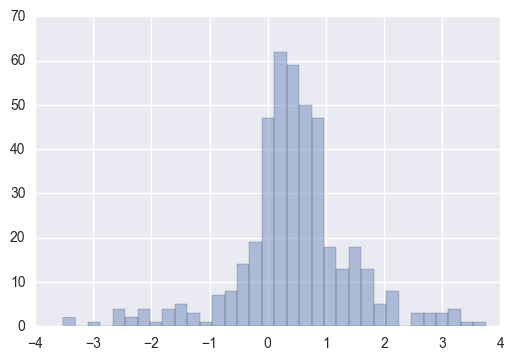

In [596]:
# Finding skewness ignoring NaN values
wap_skew = wap_train.skew()

sns.distplot(wap_skew.dropna(),kde=False)

We can observe majority of the WAP columns have a low to medium positive skewness in the region (0,1). There are still a few columns outside the (1,-1) range typically considered an acceptable range of skewness.

Next, before we apply the Normality tests, we need to fill in the out-of-range values which are currently NaN. Box-Cox transformation requires all values to be positive. For this purpose, we will add a high constant value of 120 to all our values so that even the minimum is a constant.

Also, the out-of-range values are given a value of 0.001 which now represents the minimum RSSI value in the dataset.

In [597]:
wap_train = np.power(10,wap_train/10,)
wap_test = np.power(10,wap_test/10)

abs_min = (wap_train.apply(min).min())/2

wap_train.fillna(abs_min,inplace=True)
wap_test.fillna(abs_min,inplace=True)

### Normality test 

In this sub-section, I will explore various normality tests to find out which WAP RSSI columns require transformation.

1. **Skew test**: Z-score of the test in which the null hypothesis states that that the skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.

2. **Kurtosis test**: Z-score of the test in which the null hypothesis states that the kurtosis of the population from which the sample was drawn is that of the normal distribution: kurtosis = 3(n-1)/(n+1).

3. **k2**: $s^2 + k^2$, where $s$ is the z-score returned by skew test and $k$ is the z-score returned by kurtosistest.

4. **p_value**: A 2-sided chi squared probability for the hypothesis test that the sample comes from a normal distribution. Same test as k2. 

In [598]:
from scipy.stats.mstats import normaltest, skewtest, kurtosistest, skew, kurtosis

def normal_test(s):
    s = s.dropna()
    
    # Minimum samples required for Kurtosis = 21
    # Minimum samples required for Skewness = 8
    if len(s) <=20:
        return [np.nan, np.nan]
    k2, pvalue = normaltest(s)
    return list(normaltest(s))

def skew_test(s):
    s = s.dropna()
    
    # Minimum samples required for Skewness = 8
    if len(s) <=8:
        return np.nan
    z_score,pval = skewtest(s)
    return z_score

def kurtosis_test(s):
    s = s.dropna()
    
    # Minimum samples required for Kurtosis = 21
    if len(s) <=20:
        return np.nan
    z_score,pval = kurtosistest(s)
    return z_score

def skew_score(s):
    s = s.dropna()
    return float(skew(s).data)

def kurtosis_score(s):
    s = s.dropna()
    return kurtosis(s)

def in_range(s):
    return (s > abs_min).sum()

In [599]:
wap_norm = pd.DataFrame({'Sample_Size': wap_train.apply(in_range),
                         'Normality': wap_train.apply(normal_test),
                         'Skewness': wap_train.apply(skew_score),
                         'Kurtosis': wap_train.apply(kurtosis_score),
                         'Skew_Test': wap_train.apply(skew_test),
                         'Kurtosis_Test': wap_train.apply(kurtosis_test)})

wap_norm['k2'] = (wap_norm['Normality']
                 .apply(lambda x: x[0]))

wap_norm['p_value'] = (wap_norm['Normality']
                 .apply(lambda x: x[1]))

wap_norm.drop('Normality', axis = 1,inplace = True)

wap_norm.head(15)

,Kurtosis,Kurtosis_Test,Sample_Size,Skew_Test,Skewness,k2,p_value
WAP001,1508.512580,104.235594,18,212.491555,37.475035,56017.719943,0.0
WAP002,1560.453419,104.359633,19,213.937913,38.645955,56660.363485,0.0
WAP005,955.552415,102.418983,40,200.811801,29.230202,50815.027635,0.0
WAP006,2649.547868,106.128396,308,225.291656,49.202655,62019.566895,0.0
WAP007,2544.335828,106.003750,578,224.322950,48.199228,61557.581010,0.0
WAP008,271.557039,95.730974,677,172.217857,15.904860,38823.409649,0.0
WAP009,1607.542366,104.467423,595,211.819640,36.943206,55781.002254,0.0
WAP010,1286.961254,103.634595,87,206.894483,33.268428,53545.456519,0.0
WAP011,8749.417193,109.140168,2956,254.397534,91.377383,76629.681701,0.0
WAP012,2186.418420,105.522190,2983,222.846544,46.709112,60795.514637,0.0


Let's explore the relationship between Kurtosis scores and Skew scores.

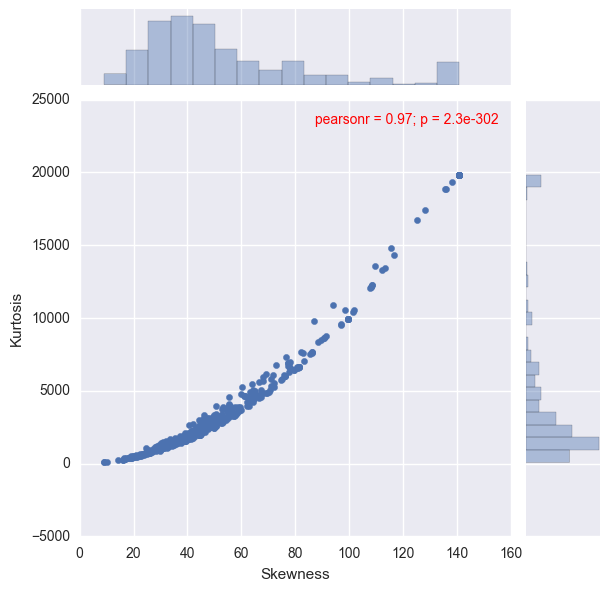

In [600]:
sns.jointplot(y="Kurtosis", x="Skewness", data=wap_norm)

**Skewness:** For normally distributed data, the skewness should be about 0. We can observe the skewness distribution is centered at 0 with majority of the values in the acceptable range of (-1,1). A skewness value > 0 means that there is more weight in the left tail of the distribution. Similarly, a negative value indicates a left-skewed distribution with more weight on the right tail.

However, there are significant number of columns with skewness outside this range up to an absolute value of 4.

**Kurtosis:** Kurtosis is the fourth central moment divided by the square of the variance. If a distribution has  positive kurtosis, that means it has more in the tails than the normal distribution. Similarly, if a distribution has a negative kurtosis, it has less in the tails than the normal distribution. 

In the above figure, we can observe the kurtosis function with the big cluster around 0. Interestingly, for the columns with a higher skewness score, the kurtosis is also more extreme.

The statistical significance of the Skewness and Kurtosis scores can be checked plotting the z-scores of the Skew test and Kurtosis tests.

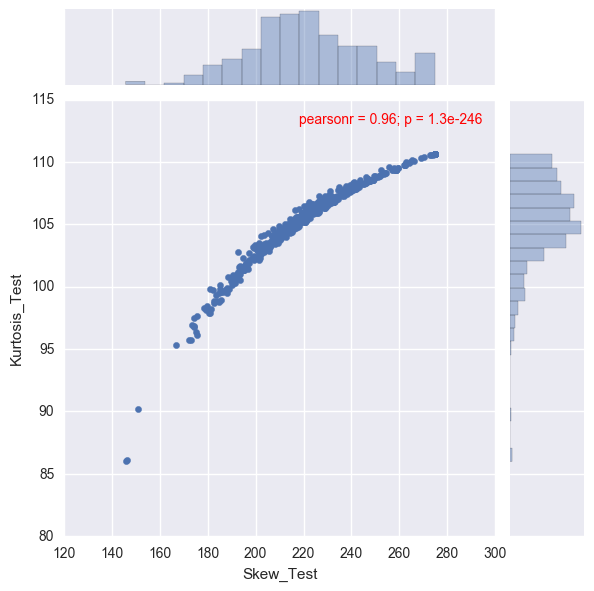

In [601]:
sns.jointplot(y="Kurtosis_Test", x="Skew_Test", data=wap_norm)

Clearly, there are over hundreds of columns with the sample statistic on both the hypotheses tests over 10 standard deviations away from the null hypothesis centers.

Before we proceed to transform the WAP RSSI columns, let's remove the columns that have 20 or less in-range values. 

In [602]:
wap_train.shape,wap_test.shape

((19861, 465), (1111, 465))

In [603]:
# Filter features with at least 20 in-range RSSI values. 
# Do the feature removal for both train and test data
#wap_test = wap_test.loc[:,wap_train.notnull().sum() > 20]

# Use
#wap_train = wap_train.loc[:,wap_train.notnull().sum() > 20]

In the above code, we perform the transform on the test data first as we are using the same boolean indexing on both train and test data. This indexing is a condition on train data. So, if we transformed the train data first then we cannot use that operation if we wanted to transform the test data in the next step.

To apply the Box-Cox transform we have to first make all our data positive. For this purpose, we add the value of 100 which was chosen in the raw dataset as the Out-of-Range value.

For example, let's observe the how the Box-Cox transformation parameter $\lambda$ is fit for the first WAP RSSI feature column in our current filtered training set. The figure below shows the Probability Plot Correlelation Coefficient, as obtained from probplot when fitting the Box-Cox transformed input feature against a normal distribution.

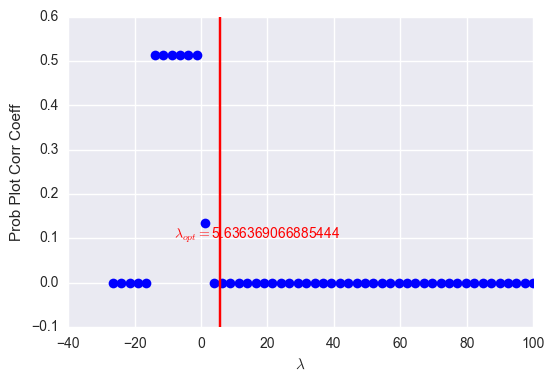

In [604]:
lmbdas, pppc = stats.boxcox_normplot(wap_train.iloc[:,100], -100, 100)

fig,ax = plt.subplots(1,1)
ax.plot(lmbdas,pppc,'bo')

_, maxlog = stats.boxcox(wap_train.iloc[:,0])
ax.axvline(maxlog, color='r')

ax.set_xlabel("$\lambda$")
ax.set_ylabel("Prob Plot Corr Coeff")
ax.text(x = -8, y = 0.1, s="$\lambda_{opt} = $" + str(maxlog))

The maximum log likelihood function peaks at $\lambda = 1.1437$. Next, let's find out the $\lambda$s for different columns in our dataset.

In [605]:
def box_cox_lambda(s):
    _, maxlog = stats.boxcox(s)
    return maxlog

In [606]:
lambda_bc = wap_train.apply(box_cox_lambda)

for wap in wap_train:
    wap_train.loc[:,wap] = stats.boxcox(wap_train.loc[:,wap],lmbda = lambda_bc.loc[wap])
    wap_test.loc[:,wap] = stats.boxcox(wap_test.loc[:,wap],lmbda = lambda_bc.loc[wap])

In [655]:
# After Box-Cox

wap_norm_post_boxcox = pd.DataFrame({'Skewness': wap_train.apply(skew_score),
                         'Kurtosis': wap_train.apply(kurtosis_score),
                         'BoxCox_Lambda': lambda_bc})

wap_norm_post_boxcox.head(15)

,BoxCox_Lambda,Kurtosis,Skewness
WAP001,5.636369,-3,0.000000
WAP002,5.636369,-3,0.000000
WAP005,5.636369,-3,0.000000
WAP006,-13.820354,--,NaN
WAP007,-6.126513,29.3916,5.602818
WAP008,-5.303734,24.3721,5.135374
WAP009,-5.137540,28.4107,5.514591
WAP010,5.636369,-3,0.000000
WAP011,-0.888475,1.91344,1.976909
WAP012,-0.882499,1.85106,1.961283


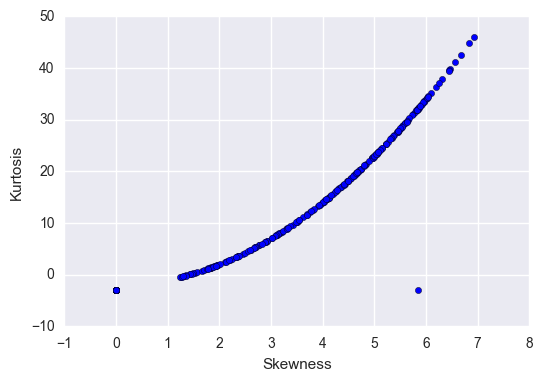

In [613]:
plt.scatter(y="Kurtosis", x="Skewness", data=wap_norm_post_boxcox)
plt.xlabel("Skewness")
plt.ylabel("Kurtosis")

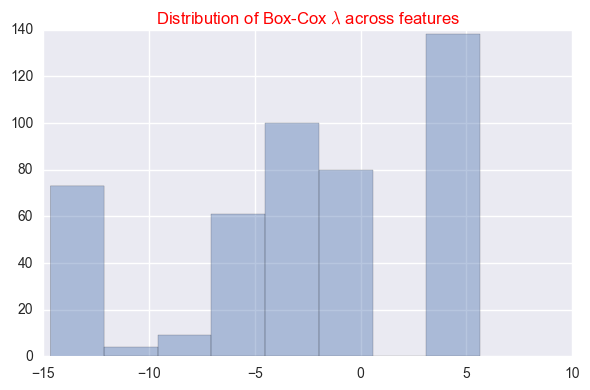

In [634]:
sns.distplot(lambda_bc, kde = False)
plt.title("Distribution of Box-Cox $\lambda$ across features")
plt.tight_layout()

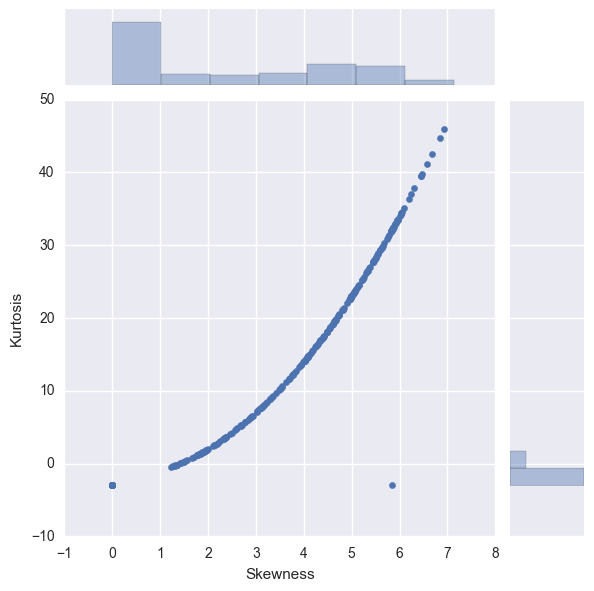

In [638]:
sns.jointplot(y="Kurtosis", x="Skewness", stat_func = None,data=wap_norm_post_boxcox)

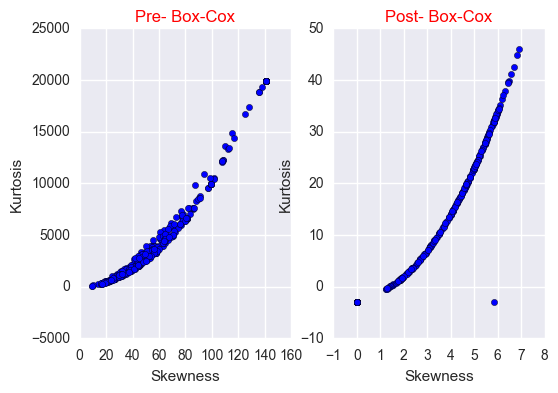

In [632]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.scatter(y="Kurtosis", x="Skewness", data=wap_norm)
ax1.set_xlabel("Skewness")
ax1.set_ylabel("Kurtosis")
ax1.set_title("Pre- Box-Cox")

ax2.scatter(y="Kurtosis", x="Skewness", data=wap_norm_post_boxcox)
ax2.set_xlabel("Skewness")
ax2.set_ylabel("Kurtosis")
ax2.set_title("Post- Box-Cox")

In [651]:
kurtosistest(np.array(wap_train.iloc[:,10]))

KurtosistestResult(statistic=47.298702046782289, pvalue=0.0)